In [1]:
import numpy as np 
import matplotlib.pyplot as plt

nsol = 555
ncat = 1
nan = 1
catl = ["Li", "Na", "K", "Rb", "Cs"]
# catl = ["Li"]
anl = ["Cl"]

watermodel = 'SPCE'
ionmodel = 'JCSPCE'

temp = 300
pressure = 1.0
simtime = 100

mpath = f"/scratch.global/tramp037/ion_hydration/simulations/{watermodel}-{ionmodel}/"

<>:73: SyntaxWarning: invalid escape sequence '\m'
<>:73: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_3077915/2047754968.py:73: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel("Distance ($\mathrm{\AA}$)")


Cl: 4.03 at 3.15
Li: 13.50 at 1.97
Na: 8.41 at 2.38
K: 5.10 at 2.73
Rb: 4.32 at 2.88
Cs: 3.71 at 2.96


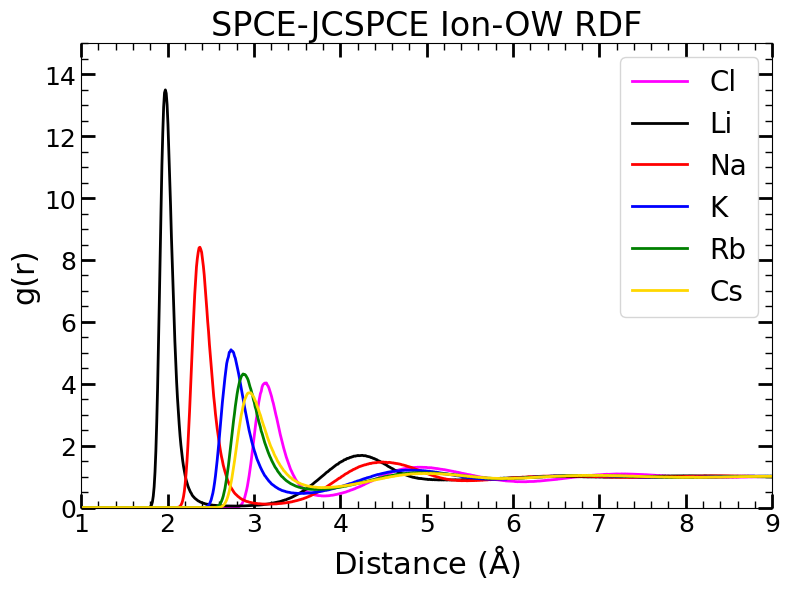

In [2]:
plt.style.use('rcParams.mplstyle')


fig, ax = plt.subplots(figsize=(8, 6))
all = dict()
avg = dict()
all[anl[0]] = []
avg[anl[0]] = []
x = []
for cation in catl:
    anion = anl[0]
    # for anion in anl:
    all[cation] = []
    avg[cation] = []
    for i in range(1, 17):
        simpath = mpath+f"{nsol}SOL_{nan}{anion}_{ncat}{cation}/{simtime}ns_{pressure:.1f}bar_{temp}K/run_{i}/"
        columns = ['x', cation, anion]
        y = dict()
        for col in columns:
            y[col] = []
        try:
            with open(simpath+f'rdf-OW.xvg') as f:
                lines = f.readlines()
                for col in columns:
                    for line in lines:
                        if line[0] == '#' or line[0] == '@':
                            continue
                        y[col].append(float(line.split()[columns.index(col)]))
                for col in columns:
                    y[col] = np.array(y[col])
                all[cation].append(y[cation])
                if cation == catl[0]:
                    all[anion].append(y[anion])
            x = y['x']
        except:
            print(f"Could not open {simpath+f'rdf-OW.xvg'}")
            continue
        

        # ax.plot(y['x'], y[catl[0]], label=i)#label=f"{catl[0]}")
        # ax.plot(y['x'], y[anl[0]], label=f"{anl[0]}")

if len(x) > 0:
    if len(all[anl[0]]) > 1:
        avg[anl[0]] = np.mean(all[anl[0]], axis=0)
    elif len(all[anl[0]]) == 1:
        avg[anl[0]] = all[anl[0]]
    if len(all[anl[0]]) > 0:
        color="magenta"
        ax.plot(x, avg[anl[0]], label=f"{anl[0]}", color=color)
        print(f"{anl[0]}: {max(avg[anl[0]]):.2f} at {x[np.argmax(avg[anl[0]])]:.2f}")
    for cation in catl:
        if cation == "Li":
            color = "black"
        elif cation == "Na":
            color = "red"
        elif cation == "K":
            color = "blue"
        elif cation == "Rb":
            color = "green"
        elif cation == "Cs":
            color = "gold"
        if len(all[cation]) > 1:
            avg[cation] = np.mean(all[cation], axis=0)
        elif len(all[cation]) == 1:
            avg[cation] = all[cation]
        if len(all[cation]) > 0:
            ax.plot(x, avg[cation], label=f"{cation}", color=color)
            print(f"{cation}: {max(avg[cation]):.2f} at {x[np.argmax(avg[cation])]:.2f}")
    ax.legend()
    ax.set_xlim(1, 9)
    ax.set_ylim(0, 15)
    ax.set_xlabel("Distance ($\mathrm{\AA}$)")
    ax.set_ylabel("g(r)")
    ax.set_title(f"{watermodel}-{ionmodel} Ion-OW RDF")
plt.tight_layout()
plt.show()




<>:91: SyntaxWarning: invalid escape sequence '\m'
<>:91: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_3077915/922954824.py:91: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel("Distance ($\mathrm{\AA}$)")
/tmp/ipykernel_3077915/922954824.py:53: RuntimeWarning: divide by zero encountered in log
  free = -0.0019872*temp*np.log(avg[anl[0]])
/tmp/ipykernel_3077915/922954824.py:54: RuntimeWarning: invalid value encountered in divide
  free_err = 0.0019872*temp*err[anl[0]]/avg[anl[0]]
/tmp/ipykernel_3077915/922954824.py:68: RuntimeWarning: divide by zero encountered in log
  free = -0.0019872*temp*np.log(avg[cation])
/tmp/ipykernel_3077915/922954824.py:69: RuntimeWarning: invalid value encountered in divide
  free_err = 0.0019872*temp*err[cation]/avg[cation]


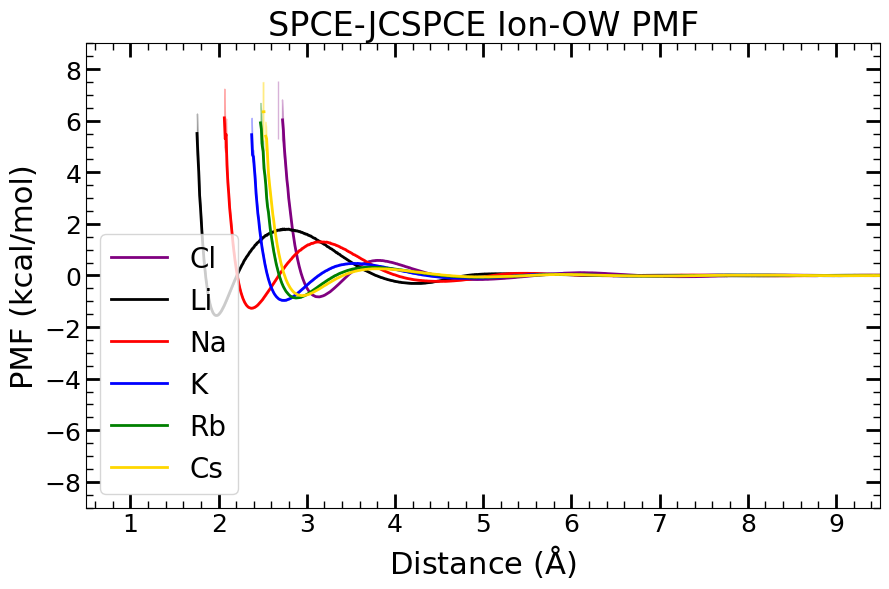

In [3]:
plt.style.use('rcParams.mplstyle')

fig, ax = plt.subplots(figsize=(9, 6))
all = dict()
avg = dict()
err = dict()
all[anl[0]] = []
avg[anl[0]] = []
err[anl[0]] = []
for cation in catl:
    anion = anl[0]
    # for anion in anl:
    all[cation] = []
    avg[cation] = []
    err[cation] = []
    for i in range(1, 17):
        simpath = mpath+f"{nsol}SOL_{nan}{anion}_{ncat}{cation}/{simtime}ns_{pressure:.1f}bar_{temp}K/run_{i}/"
        columns = ['x', cation, anion]
        y = dict()
        for col in columns:
            y[col] = []
        try:
            with open(simpath+f'rdf-OW.xvg') as f:
                lines = f.readlines()
                for col in columns:
                    for line in lines:
                        if line[0] == '#' or line[0] == '@':
                            continue
                        y[col].append(float(line.split()[columns.index(col)]))
                for col in columns:
                    y[col] = np.array(y[col])
                all[cation].append(y[cation])
                if cation == catl[0]:
                    all[anion].append(y[anion])
            x = y['x']
        except:
            print(f"Could not open {simpath+f'rdf-OW.xvg'}")
            continue
        

        # ax.plot(y['x'], y[catl[0]], label=i)#label=f"{catl[0]}")
        # ax.plot(y['x'], y[anl[0]], label=f"{anl[0]}")

# print(all[anl[0]])
# if len(all[anl[0]]) > 1:
#     avg[anl[0]] = np.mean(all[anl[0]], axis=0)
# else:
#     avg[anl[0]] = all[anl[0]]
# ax.plot(x, avg[anl[0]], label=f"{anl[0]}")
if len(all[anl[0]]) > 1:
    avg[anl[0]] = np.mean(all[anl[0]], axis=0)
    err[anl[0]] = 1.96*np.std(all[anl[0]], axis=0)/np.sqrt(len(all[anl[0]]))
    free = -0.0019872*temp*np.log(avg[anl[0]])
    free_err = 0.0019872*temp*err[anl[0]]/avg[anl[0]]
    color = "purple"
    ax.plot(x, free, label=f"{anl[0]}", color=color)
    # ax.plot(x, avg[cation], label=f"{cation}-{anl[0]}")
    ax.fill_between(x, free-free_err, free+free_err, alpha=0.3, color=color)
elif len(all[anl[0]]) == 1:
    avg[anl[0]] = all[anl[0]][0]
    free = -0.0019872*temp*np.log(avg[anl[0]])
    ax.plot(x, free, label=f"{anl[0]}")
    # ax.plot(x, avg[cation], label=f"{cation}-{anl[0]}")
for cation in catl:
    if len(all[cation]) > 1:
        avg[cation] = np.mean(all[cation], axis=0)
        err[cation] = 1.96*np.std(all[cation], axis=0)/np.sqrt(len(all[cation]))
        free = -0.0019872*temp*np.log(avg[cation])
        free_err = 0.0019872*temp*err[cation]/avg[cation]
        if cation == "Li":
            color = "black"
        elif cation == "Na":
            color = "red"
        elif cation == "K":
            color = "blue"
        elif cation == "Rb":
            color = "green"
        elif cation == "Cs":
            color = "gold"
        ax.plot(x, free, label=f"{cation}", color=color)
        # ax.plot(x, avg[cation], label=f"{cation}-{anl[0]}")
        ax.fill_between(x, free-free_err, free+free_err, alpha=0.3, color=color)
    elif len(all[cation]) == 1:
        avg[cation] = all[cation][0]
        free = -0.0019872*temp*np.log(avg[cation])
        ax.plot(x, free, label=f"{cation}")
        # ax.plot(x, avg[cation], label=f"{cation}-{anl[0]}")
ax.legend()
ax.set_xlim(0.5, 9.5)
ax.set_ylim(-9, 9)
ax.set_xlabel("Distance ($\mathrm{\AA}$)")
ax.set_ylabel("PMF (kcal/mol)")
ax.set_title(f"{watermodel}-{ionmodel} Ion-OW PMF")
plt.tight_layout()
plt.show()




<>:71: SyntaxWarning: invalid escape sequence '\m'
<>:71: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_3077915/2770451007.py:71: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel("Distance ($\mathrm{\AA}$)")


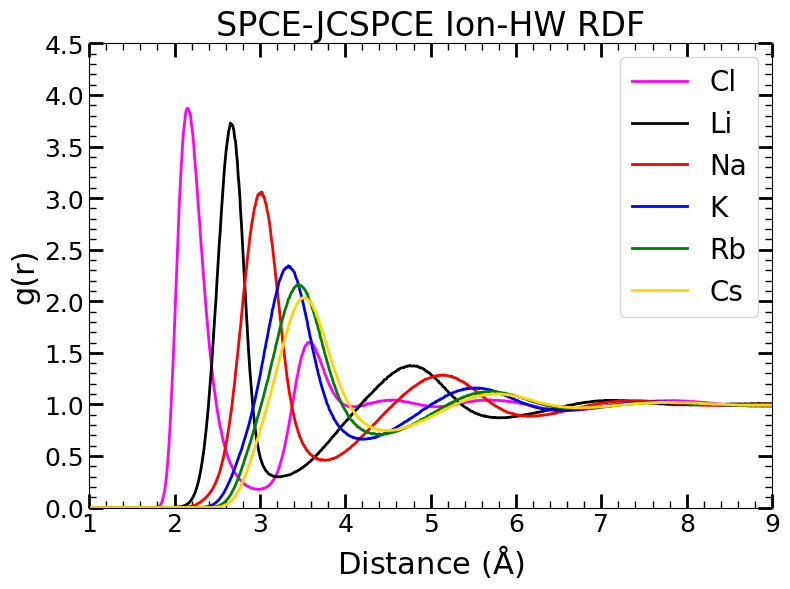

In [4]:
plt.style.use('rcParams.mplstyle')


fig, ax = plt.subplots(figsize=(8, 6))
all = dict()
avg = dict()
all[anl[0]] = []
avg[anl[0]] = []
x = []
for cation in catl:
    anion = anl[0]
    # for anion in anl:
    all[cation] = []
    avg[cation] = []
    for i in range(1, 17):
        simpath = mpath+f"{nsol}SOL_{nan}{anion}_{ncat}{cation}/{simtime}ns_{pressure:.1f}bar_{temp}K/run_{i}/"
        columns = ['x', cation, anion]
        y = dict()
        for col in columns:
            y[col] = []
        try:
            with open(simpath+f'rdf-HW.xvg') as f:
                lines = f.readlines()
                for col in columns:
                    for line in lines:
                        if line[0] == '#' or line[0] == '@':
                            continue
                        y[col].append(float(line.split()[columns.index(col)]))
                for col in columns:
                    y[col] = np.array(y[col])
                all[cation].append(y[cation])
                if cation == catl[0]:
                    all[anion].append(y[anion])
            x = y['x']
        except:
            print(f"Could not open {simpath+f'rdf-HW.xvg'}")
            continue
        

        # ax.plot(y['x'], y[catl[0]], label=i)#label=f"{catl[0]}")
        # ax.plot(y['x'], y[anl[0]], label=f"{anl[0]}")

if len(x) > 0:
    if len(all[anl[0]]) > 1:
        avg[anl[0]] = np.mean(all[anl[0]], axis=0)
    elif len(all[anl[0]]) == 1:
        avg[anl[0]] = all[anl[0]]
    if len(all[anl[0]]) > 0:
        color="magenta"
        ax.plot(x, avg[anl[0]], label=f"{anl[0]}", color=color)
    for cation in catl:
        if cation == "Li":
            color = "black"
        elif cation == "Na":
            color = "red"
        elif cation == "K":
            color = "blue"
        elif cation == "Rb":
            color = "green"
        elif cation == "Cs":
            color = "gold"
        if len(all[cation]) > 1:
            avg[cation] = np.mean(all[cation], axis=0)
        elif len(all[cation]) == 1:
            avg[cation] = all[cation]
        if len(all[cation]) > 0:
            ax.plot(x, avg[cation], label=f"{cation}", color=color)
    ax.legend()
    ax.set_xlim(1, 9)
    ax.set_ylim(0, 4.5)
    ax.set_xlabel("Distance ($\mathrm{\AA}$)")
    ax.set_ylabel("g(r)")
    ax.set_title(f"{watermodel}-{ionmodel} Ion-HW RDF")
plt.tight_layout()
plt.show()





<>:91: SyntaxWarning: invalid escape sequence '\m'
<>:91: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_3077915/3109451589.py:91: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel("Distance ($\mathrm{\AA}$)")
/tmp/ipykernel_3077915/3109451589.py:53: RuntimeWarning: divide by zero encountered in log
  free = -0.0019872*temp*np.log(avg[anl[0]])
/tmp/ipykernel_3077915/3109451589.py:54: RuntimeWarning: invalid value encountered in divide
  free_err = 0.0019872*temp*err[anl[0]]/avg[anl[0]]
/tmp/ipykernel_3077915/3109451589.py:68: RuntimeWarning: divide by zero encountered in log
  free = -0.0019872*temp*np.log(avg[cation])
/tmp/ipykernel_3077915/3109451589.py:69: RuntimeWarning: invalid value encountered in divide
  free_err = 0.0019872*temp*err[cation]/avg[cation]


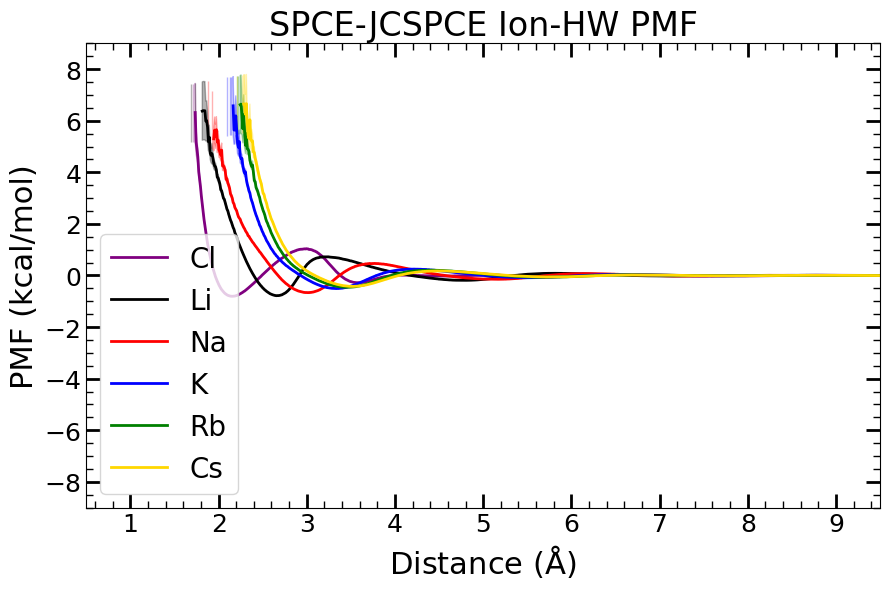

In [5]:
plt.style.use('rcParams.mplstyle')

fig, ax = plt.subplots(figsize=(9, 6))
all = dict()
avg = dict()
err = dict()
all[anl[0]] = []
avg[anl[0]] = []
err[anl[0]] = []
for cation in catl:
    anion = anl[0]
    # for anion in anl:
    all[cation] = []
    avg[cation] = []
    err[cation] = []
    for i in range(1, 17):
        simpath = mpath+f"{nsol}SOL_{nan}{anion}_{ncat}{cation}/{simtime}ns_{pressure:.1f}bar_{temp}K/run_{i}/"
        columns = ['x', cation, anion]
        y = dict()
        for col in columns:
            y[col] = []
        try:
            with open(simpath+f'rdf-HW.xvg') as f:
                lines = f.readlines()
                for col in columns:
                    for line in lines:
                        if line[0] == '#' or line[0] == '@':
                            continue
                        y[col].append(float(line.split()[columns.index(col)]))
                for col in columns:
                    y[col] = np.array(y[col])
                all[cation].append(y[cation])
                if cation == catl[0]:
                    all[anion].append(y[anion])
            x = y['x']
        except:
            print(f"Could not open {simpath+f'rdf-HW.xvg'}")
            continue
        

        # ax.plot(y['x'], y[catl[0]], label=i)#label=f"{catl[0]}")
        # ax.plot(y['x'], y[anl[0]], label=f"{anl[0]}")

# print(all[anl[0]])
# if len(all[anl[0]]) > 1:
#     avg[anl[0]] = np.mean(all[anl[0]], axis=0)
# else:
#     avg[anl[0]] = all[anl[0]]
# ax.plot(x, avg[anl[0]], label=f"{anl[0]}")
if len(all[anl[0]]) > 1:
    avg[anl[0]] = np.mean(all[anl[0]], axis=0)
    err[anl[0]] = 1.96*np.std(all[anl[0]], axis=0)/np.sqrt(len(all[anl[0]]))
    free = -0.0019872*temp*np.log(avg[anl[0]])
    free_err = 0.0019872*temp*err[anl[0]]/avg[anl[0]]
    color = "purple"
    ax.plot(x, free, label=f"{anl[0]}", color=color)
    # ax.plot(x, avg[cation], label=f"{cation}-{anl[0]}")
    ax.fill_between(x, free-free_err, free+free_err, alpha=0.3, color=color)
elif len(all[anl[0]]) == 1:
    avg[anl[0]] = all[anl[0]][0]
    free = -0.0019872*temp*np.log(avg[anl[0]])
    ax.plot(x, free, label=f"{anl[0]}")
    # ax.plot(x, avg[cation], label=f"{cation}-{anl[0]}")
for cation in catl:
    if len(all[cation]) > 1:
        avg[cation] = np.mean(all[cation], axis=0)
        err[cation] = 1.96*np.std(all[cation], axis=0)/np.sqrt(len(all[cation]))
        free = -0.0019872*temp*np.log(avg[cation])
        free_err = 0.0019872*temp*err[cation]/avg[cation]
        if cation == "Li":
            color = "black"
        elif cation == "Na":
            color = "red"
        elif cation == "K":
            color = "blue"
        elif cation == "Rb":
            color = "green"
        elif cation == "Cs":
            color = "gold"
        ax.plot(x, free, label=f"{cation}", color=color)
        # ax.plot(x, avg[cation], label=f"{cation}-{anl[0]}")
        ax.fill_between(x, free-free_err, free+free_err, alpha=0.3, color=color)
    elif len(all[cation]) == 1:
        avg[cation] = all[cation][0]
        free = -0.0019872*temp*np.log(avg[cation])
        ax.plot(x, free, label=f"{cation}")
        # ax.plot(x, avg[cation], label=f"{cation}-{anl[0]}")
ax.legend()
ax.set_xlim(0.5, 9.5)
ax.set_ylim(-9, 9)
ax.set_xlabel("Distance ($\mathrm{\AA}$)")
ax.set_ylabel("PMF (kcal/mol)")
ax.set_title(f"{watermodel}-{ionmodel} Ion-HW PMF")
plt.tight_layout()
plt.show()




<>:70: SyntaxWarning: invalid escape sequence '\m'
<>:70: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_3077915/273507933.py:70: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel("Distance ($\mathrm{\AA}$)")


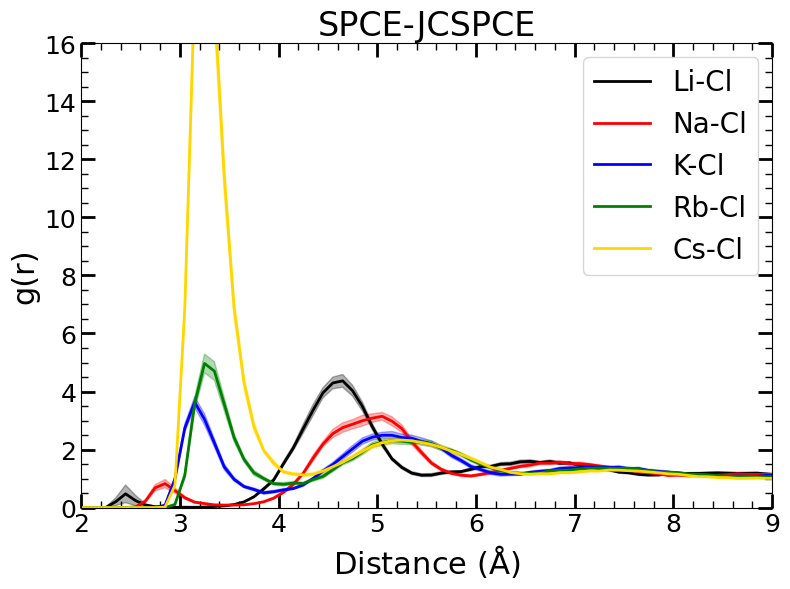

In [6]:
plt.style.use('rcParams.mplstyle')

fig, ax = plt.subplots(figsize=(8, 6))
all = dict()
avg = dict()
err = dict()
all[anl[0]] = []
avg[anl[0]] = []
err[anl[0]] = []
for cation in catl:
    anion = anl[0]
    # for anion in anl:
    all[cation] = []
    avg[cation] = []
    err[cation] = []
    for i in range(1, 17):
        simpath = mpath+f"{nsol}SOL_{nan}{anion}_{ncat}{cation}/{simtime}ns_{pressure:.1f}bar_{temp}K/run_{i}/"
        columns = ['x', cation]
        y = dict()
        for col in columns:
            y[col] = []
        try:
            with open(simpath+f'rdf-{cation}-{anion}.xvg') as f:
                lines = f.readlines()
                for col in columns:
                    for line in lines:
                        if line[0] == '#' or line[0] == '@':
                            continue
                        y[col].append(float(line.split()[columns.index(col)]))
                for col in columns:
                    y[col] = np.array(y[col])
                all[cation].append(y[cation])
                x = y['x']
        except:
            print(f"Could not open {simpath+f'rdf-{cation}-{anion}.xvg'}")
            continue
        

        # ax.plot(y['x'], y[catl[0]], label=i)#label=f"{catl[0]}")
        # ax.plot(y['x'], y[anl[0]], label=f"{anl[0]}")

# print(all[anl[0]])
# if len(all[anl[0]]) > 1:
#     avg[anl[0]] = np.mean(all[anl[0]], axis=0)
# else:
#     avg[anl[0]] = all[anl[0]]
# ax.plot(x, avg[anl[0]], label=f"{anl[0]}")
for cation in catl:
    if cation == "Li":
        color = "black"
    elif cation == "Na":
        color = "red"
    elif cation == "K":
        color = "blue"
    elif cation == "Rb":
        color = "green"
    elif cation == "Cs":
        color = "gold"
    if len(all[cation]) > 1:
        avg[cation] = np.mean(all[cation], axis=0)
        err[cation] = 1.96*np.std(all[cation], axis=0)/np.sqrt(len(all[cation]))
        ax.plot(x, avg[cation], label=f"{cation}-{anl[0]}", color=color)
        ax.fill_between(x, avg[cation]-err[cation], avg[cation]+err[cation], alpha=0.3, color=color)
    elif len(all[cation]) == 1:
        avg[cation] = all[cation][0]
        ax.plot(x, avg[cation], label=f"{cation}-{anl[0]}")
ax.legend()
ax.set_xlim(2, 9)
ax.set_ylim(0, 16)
ax.set_xlabel("Distance ($\mathrm{\AA}$)")
ax.set_ylabel("g(r)")
ax.set_title(f"{watermodel}-{ionmodel}")
plt.tight_layout()
plt.show()





<>:78: SyntaxWarning: invalid escape sequence '\m'
<>:78: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_3077915/40066695.py:78: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel("Distance ($\mathrm{\AA}$)")
/tmp/ipykernel_3077915/40066695.py:54: RuntimeWarning: divide by zero encountered in log
  free = -np.log(avg[cation])
/tmp/ipykernel_3077915/40066695.py:55: RuntimeWarning: invalid value encountered in divide
  free_err = err[cation]/avg[cation]


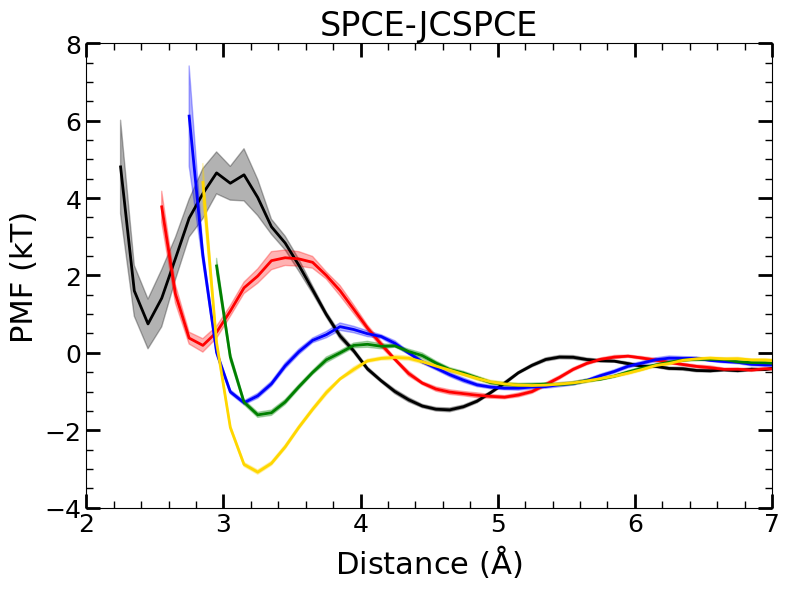

In [7]:
plt.style.use('rcParams.mplstyle')

fig, ax = plt.subplots(figsize=(8, 6))
all = dict()
avg = dict()
err = dict()
all[anl[0]] = []
avg[anl[0]] = []
err[anl[0]] = []
for cation in catl:
    anion = anl[0]
    # for anion in anl:
    all[cation] = []
    avg[cation] = []
    err[cation] = []
    for i in range(1, 17):
        simpath = mpath+f"{nsol}SOL_{nan}{anion}_{ncat}{cation}/{simtime}ns_{pressure:.1f}bar_{temp}K/run_{i}/"
        columns = ['x', cation]
        y = dict()
        for col in columns:
            y[col] = []
        try:
            with open(simpath+f'rdf-{cation}-{anion}.xvg') as f:
                lines = f.readlines()
                for col in columns:
                    for line in lines:
                        if line[0] == '#' or line[0] == '@':
                            continue
                        y[col].append(float(line.split()[columns.index(col)]))
                for col in columns:
                    y[col] = np.array(y[col])
                all[cation].append(y[cation])
                x = y['x']
        except:
            print(f"Could not open {simpath+f'rdf-{cation}-{anion}.xvg'}")
            continue
        

        # ax.plot(y['x'], y[catl[0]], label=i)#label=f"{catl[0]}")
        # ax.plot(y['x'], y[anl[0]], label=f"{anl[0]}")

# print(all[anl[0]])
# if len(all[anl[0]]) > 1:
#     avg[anl[0]] = np.mean(all[anl[0]], axis=0)
# else:
#     avg[anl[0]] = all[anl[0]]
# ax.plot(x, avg[anl[0]], label=f"{anl[0]}")
for cation in catl:
    if len(all[cation]) > 1:
        avg[cation] = np.mean(all[cation], axis=0)
        err[cation] = 1.96*np.std(all[cation], axis=0)/np.sqrt(len(all[cation]))
        # free = -0.0019872*temp*np.log(avg[cation])
        # free_err = 0.0019872*temp*err[cation]/avg[cation]
        free = -np.log(avg[cation])
        free_err = err[cation]/avg[cation]
        if cation == "Li":
            color = "black"
        elif cation == "Na":
            color = "red"
        elif cation == "K":
            color = "blue"
        elif cation == "Rb":
            color = "green"
        elif cation == "Cs":
            color = "gold"
        ax.plot(x, free, label=f"{cation}-{anl[0]}", color=color)
        # ax.plot(x, avg[cation], label=f"{cation}-{anl[0]}")
        ax.fill_between(x, free-free_err, free+free_err, alpha=0.3, color=color)
    elif len(all[cation]) == 1:
        avg[cation] = all[cation][0]
        # free = -0.0019872*temp*np.log(avg[cation])
        free = -np.log(avg[cation])
        ax.plot(x, free, label=f"{cation}-{anl[0]}")
        # ax.plot(x, avg[cation], label=f"{cation}-{anl[0]}")
# ax.legend()
ax.set_xlim(2, 7)
ax.set_ylim(-4, 8)
ax.set_xlabel("Distance ($\mathrm{\AA}$)")
ax.set_ylabel("PMF (kT)")
ax.set_title(f"{watermodel}-{ionmodel}")
plt.tight_layout()
plt.show()




<>:88: SyntaxWarning: invalid escape sequence '\c'
<>:88: SyntaxWarning: invalid escape sequence '\c'
<>:88: SyntaxWarning: invalid escape sequence '\c'
<>:88: SyntaxWarning: invalid escape sequence '\c'
<>:88: SyntaxWarning: invalid escape sequence '\c'
<>:88: SyntaxWarning: invalid escape sequence '\c'
<>:88: SyntaxWarning: invalid escape sequence '\c'
<>:88: SyntaxWarning: invalid escape sequence '\c'
<>:88: SyntaxWarning: invalid escape sequence '\c'
<>:88: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_3077915/2260666186.py:88: SyntaxWarning: invalid escape sequence '\c'
  secax.set_xticklabels(['0$^{\circ}$', '60$^{\circ}$', '90$^{\circ}$', '120$^{\circ}$', '180$^{\circ}$'], rotation=45, ha='right')
/tmp/ipykernel_3077915/2260666186.py:88: SyntaxWarning: invalid escape sequence '\c'
  secax.set_xticklabels(['0$^{\circ}$', '60$^{\circ}$', '90$^{\circ}$', '120$^{\circ}$', '180$^{\circ}$'], rotation=45, ha='right')
/tmp/ipykernel_3077915/2260666186.py:88: SyntaxWarning: 

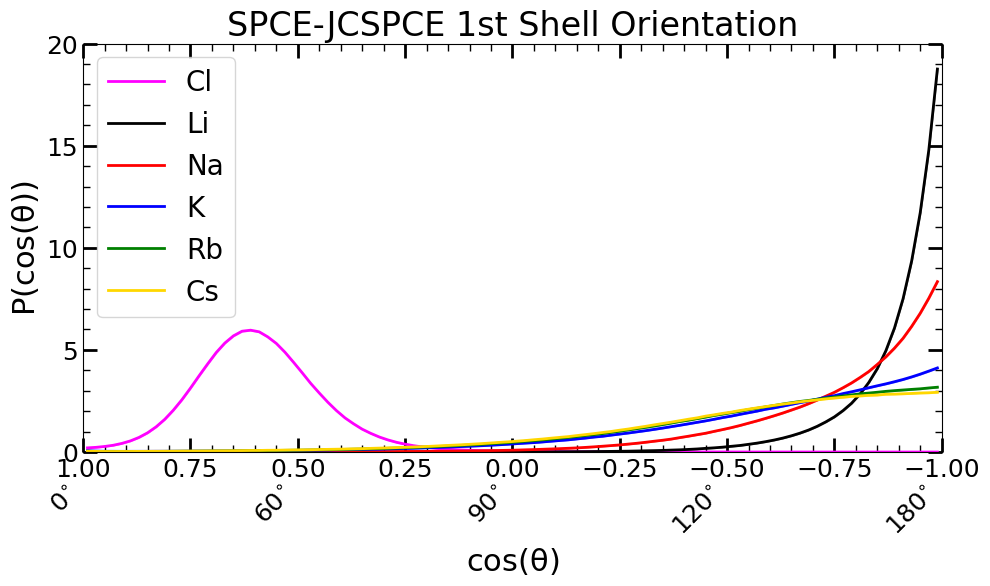

In [8]:
plt.style.use('rcParams.mplstyle')


fig, ax = plt.subplots(figsize=(10, 6))
all = dict()
avg = dict()
all[anl[0]] = []
avg[anl[0]] = []
err[anl[0]] = []
x = []
for cation in catl:
    anion = anl[0]
    # for anion in anl:
    all[cation] = []
    avg[cation] = []
    err[cation] = []
    for i in range(1, 17):
        simpath = mpath+f"{nsol}SOL_{nan}{anion}_{ncat}{cation}/{simtime}ns_{pressure:.1f}bar_{temp}K/run_{i}/"
        columns = ['x', cation, anion]
        y = dict()
        for col in columns:
            y[col] = []
        try:
            with open(simpath+f'solvation_orientation.xvg') as f:
                lines = f.readlines()
                for col in columns:
                    for line in lines:
                        if line[0] == '#' or line[0] == '@':
                            continue
                        y[col].append(float(line.split()[columns.index(col)]))
                for col in columns:
                    y[col] = np.array(y[col])
                all[cation].append(y[cation])
                if cation == catl[0]:
                    all[anion].append(y[anion])
            x = y['x']
        except:
            print(f"Could not open {simpath+f'solvation_orientation.xvg'}")
            continue
        

        # ax.plot(y['x'], y[catl[0]], label=i)#label=f"{catl[0]}")
        # ax.plot(y['x'], y[anl[0]], label=f"{anl[0]}")

if len(x) > 0:
    color = "magenta"
    if len(all[anl[0]]) > 1:
        avg[anl[0]] = np.mean(all[anl[0]], axis=0)
        err[anl[0]] = 1.96*np.std(all[anl[0]], axis=0)/np.sqrt(len(all[anl[0]]))
        ax.plot(x, 2*avg[anl[0]], label=f"{anl[0]}", color=color)
        ax.fill_between(x, 2*avg[anl[0]]-2*err[anl[0]], 2*avg[anl[0]]+2*err[anl[0]], alpha=0.3, color=color)
    elif len(all[anl[0]]) == 1:
        avg[anl[0]] = all[anl[0]][0]
        ax.plot(x, 2*avg[anl[0]], label=f"{anl[0]}", color=color)
    for cation in catl:
        if cation == "Li":
            color = "black"
        elif cation == "Na":
            color = "red"
        elif cation == "K":
            color = "blue"
        elif cation == "Rb":
            color = "green"
        elif cation == "Cs":
            color = "gold"
        if len(all[cation]) > 1:
            avg[cation] = np.mean(all[cation], axis=0)
            err[cation] = 1.96*np.std(all[cation], axis=0)/np.sqrt(len(all[cation]))
            ax.plot(x, 2*avg[cation], label=f"{cation}", color=color)
            ax.fill_between(x, 2*avg[cation]-2*err[cation], 2*avg[cation]+2*err[cation], alpha=0.3, color=color)
        elif len(all[cation]) == 1:
            avg[cation] = all[cation][0]
            ax.plot(x, 2*avg[cation], label=f"{cation}", color=color)

            
    ax.set_xlim(-1, 1) 
    ax.set_ylim(0, 20)
    ax.set_yticks([0, 5, 10, 15, 20])

    def arccos_transform(x):
        return np.arccos(x)*180/np.pi

    def cos_transform(x):
        return np.cos(x*np.pi/180)

    secax = ax.secondary_xaxis(-0.06, functions=(arccos_transform, cos_transform))
    secax.set_xticks([0, 60, 90, 120, 180])
    secax.set_xticklabels(['0$^{\circ}$', '60$^{\circ}$', '90$^{\circ}$', '120$^{\circ}$', '180$^{\circ}$'], rotation=45, ha='right')
    secax.spines['bottom'].set_visible(False)
    secax.tick_params(axis='x', which='both', length=0)


    # ax2 = ax.twiny()
    # ax2.set_xticks([np.arccos(-1)*180/np.pi, np.arccos(-np.sqrt(3/4))*180/np.pi, np.arccos(-0.5)*180/np.pi, np.arccos(0)*180/np.pi, np.arccos(0.5)*180/np.pi, np.arccos(np.sqrt(3/4))*180/np.pi, np.arccos(1)*180/np.pi])

    secax.set_xlabel(r'cos($\mathrm{\theta}$)')
    ax.set_ylabel(r'P(cos($\mathrm{\theta}$))')
    # ax.set_xlim(0, 180)
    # ax.axvline(x=np.cos(104.52/2*np.pi/180), color='k', linestyle='--', linewidth=1)
    ax.set_title(f'{watermodel}-{ionmodel} 1st Shell Orientation')
    ax.legend()
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()




<>:74: SyntaxWarning: invalid escape sequence '\m'
<>:78: SyntaxWarning: invalid escape sequence '\m'
<>:79: SyntaxWarning: invalid escape sequence '\m'
<>:74: SyntaxWarning: invalid escape sequence '\m'
<>:78: SyntaxWarning: invalid escape sequence '\m'
<>:79: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_3077915/3964581900.py:74: SyntaxWarning: invalid escape sequence '\m'
  plt.colorbar(label='Density ($\mathrm{\AA}^-3$)')
/tmp/ipykernel_3077915/3964581900.py:78: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('z ($\mathrm{\AA}$)')
/tmp/ipykernel_3077915/3964581900.py:79: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('x ($\mathrm{\AA}$)')


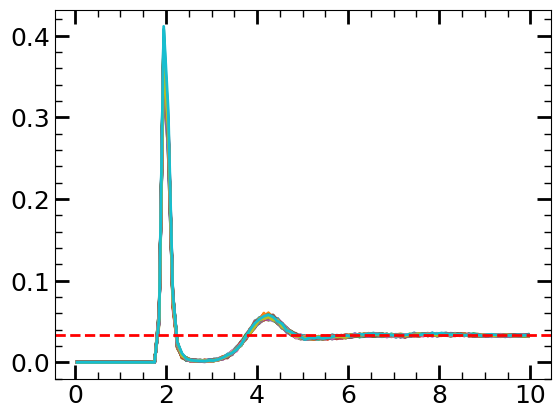

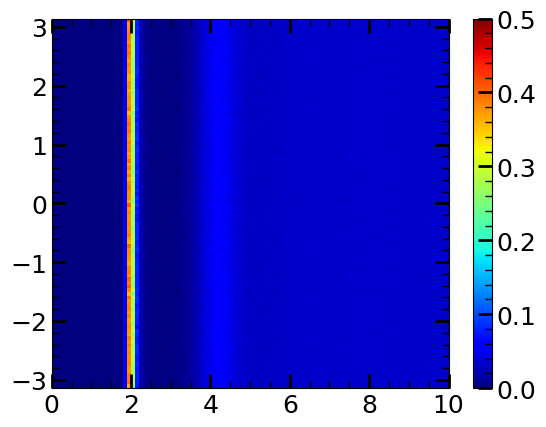

/tmp/ipykernel_3077915/3964581900.py:73: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x,y,cnt, cmap='jet', vmax=0.5)


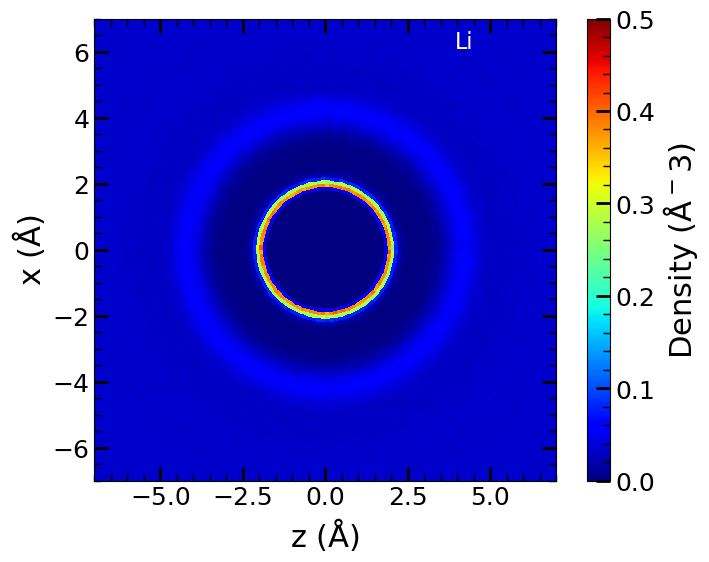

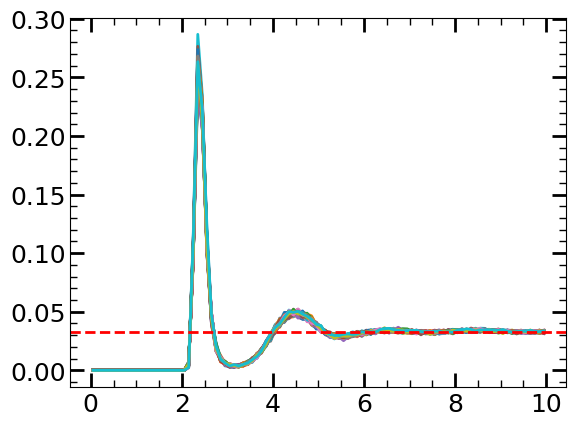

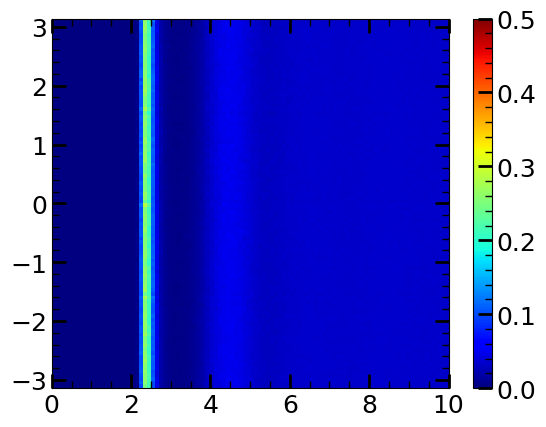

/tmp/ipykernel_3077915/3964581900.py:73: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x,y,cnt, cmap='jet', vmax=0.5)


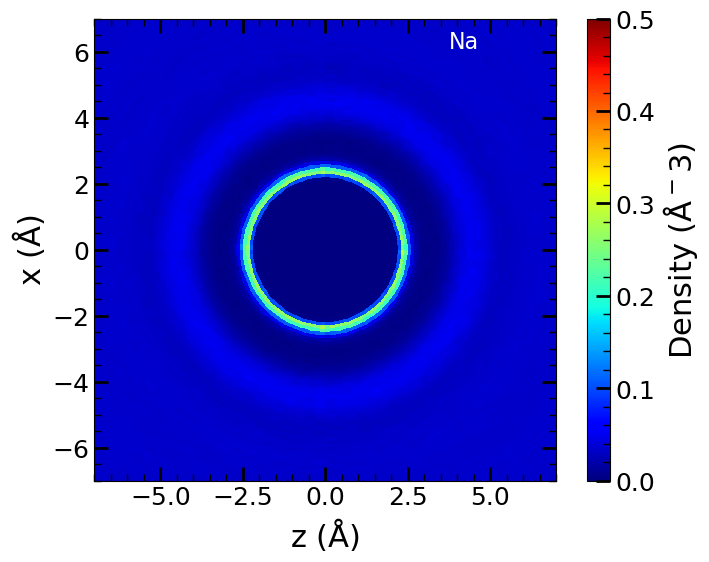

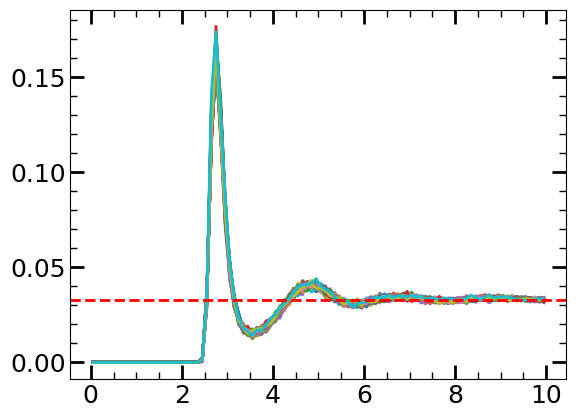

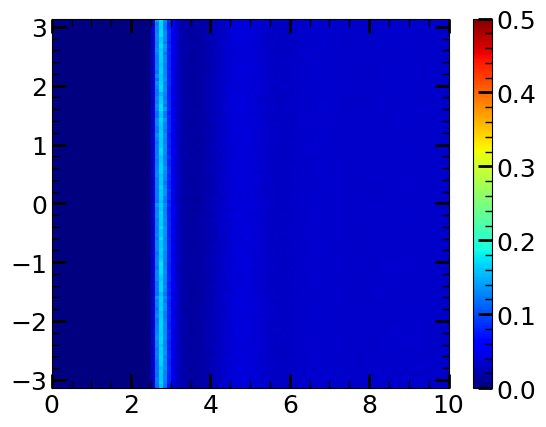

/tmp/ipykernel_3077915/3964581900.py:73: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x,y,cnt, cmap='jet', vmax=0.5)


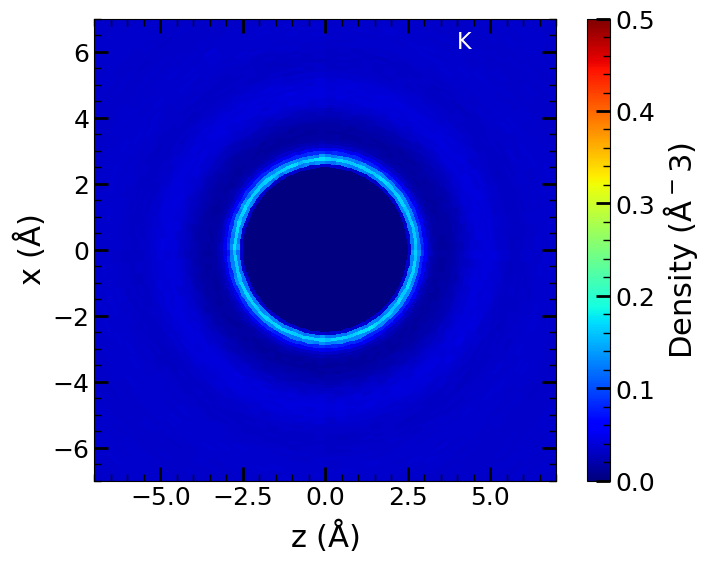

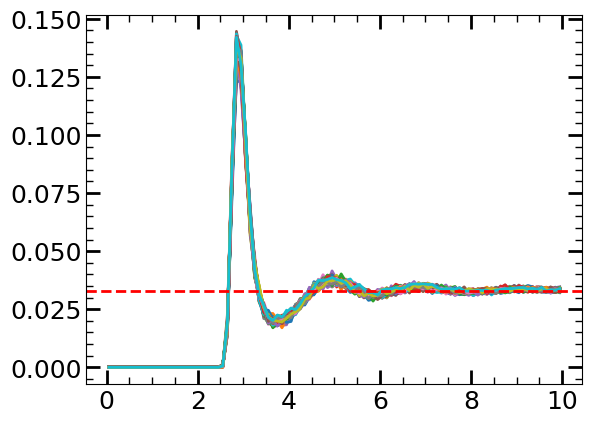

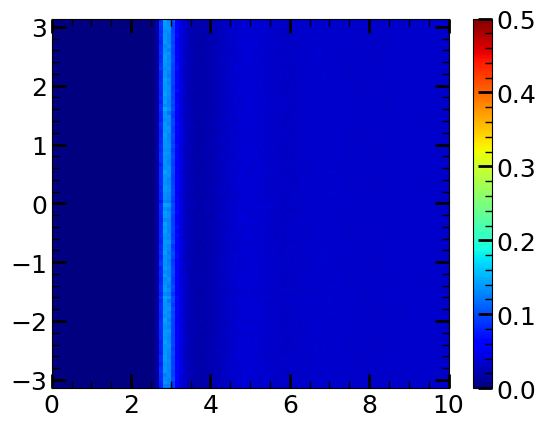

/tmp/ipykernel_3077915/3964581900.py:73: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x,y,cnt, cmap='jet', vmax=0.5)


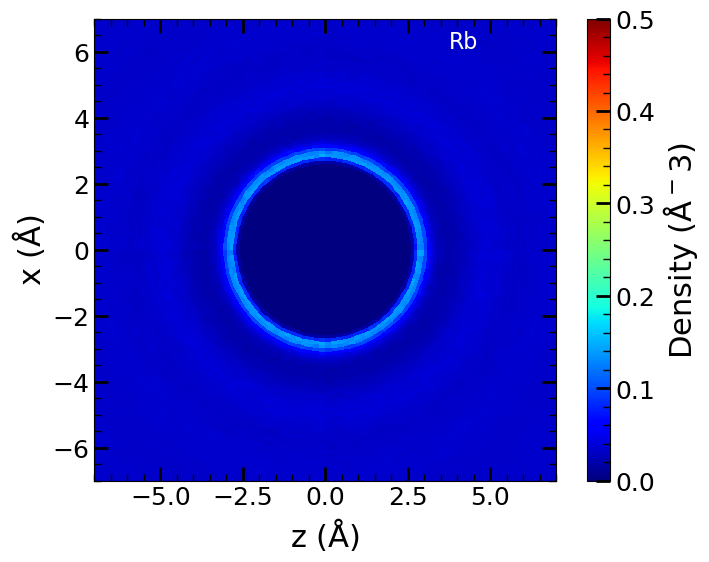

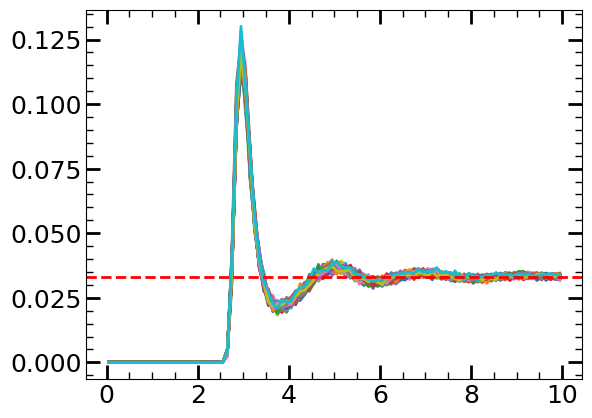

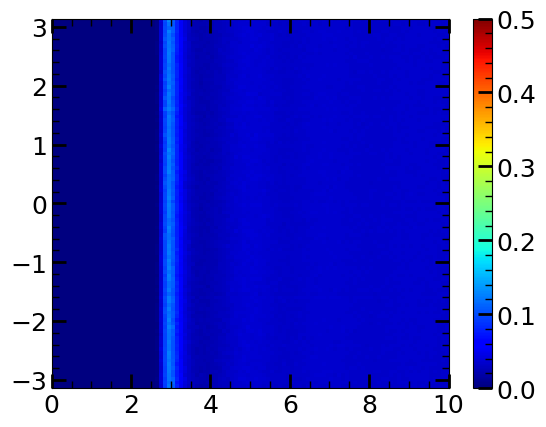

/tmp/ipykernel_3077915/3964581900.py:73: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x,y,cnt, cmap='jet', vmax=0.5)


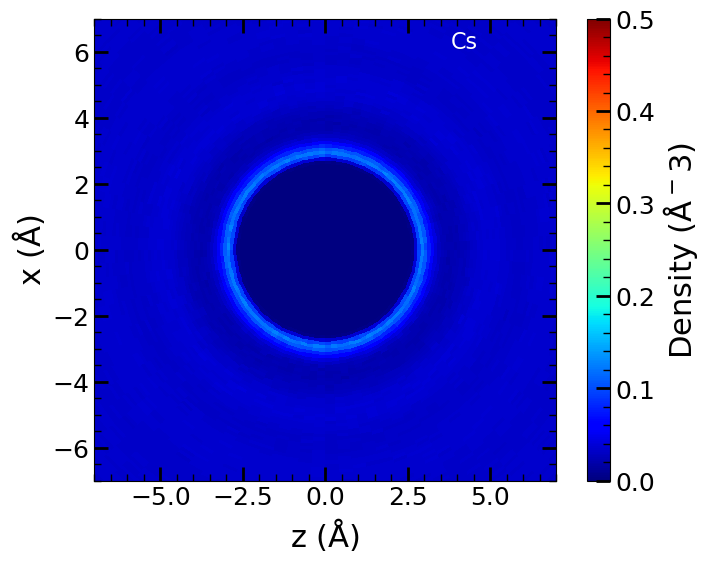

In [9]:
for cation in catl: 
    xvg_file = f"/scratch.global/tramp037/ion_hydration/simulations/{watermodel}-{ionmodel}/{nsol}SOL_{nan}{anl[0]}_{ncat}{cation}/{simtime}ns_{pressure}bar_{temp}K/run_1/2d_radialdensity_{cation}.xvg"
    centers_t = []
    try:
        with open(xvg_file, 'r') as f:
            count = 0
            for line in f:
                # skip lines starting with # and @
                if line.startswith(('#', '@')):
                    continue
                else:
                    # obtain the x values (first column) and y values for specified columns
                    values = line.split()
                    if count == 0:
                        bins = [int(v) for v in values]
                        cnt = np.zeros((bins[0],bins[1]))
                    elif count == 1:
                        centers_r = [float(v) for v in values]
                    elif count < bins[1]+2:
                        centers_t.append(float(values[0]))
                        for i in range(bins[0]):
                            cnt[i,count-2] = float(values[i+1])


                    # x.append(float(values[0]))
                    # for i, c in enumerate(columns):
                    #     # do not add for columns without a name
                    #     if c == '':
                    #         continue
                    #     # print(values,i,path_to_file)
                    #     if values[i+1] == 'nan':
                    #         y[c].append(np.nan)
                    #     y[c].append(float(values[i+1]))
                    count += 1
        # print(centers_r)
        # print(centers_t)
        # print(cnt)
            
        plt.style.use('rcParams.mplstyle')
        for i in range(bins[1]):
            plt.plot(centers_r,cnt[:,i])
        plt.axhline(y=0.033, color='r', linestyle='--')
        plt.show()

        # 2D histogram plot of cnt
        plt.figure()
        # plot with borders around each bin
        plt.pcolormesh(centers_r,centers_t,cnt.T, cmap='jet', vmax=0.5)
        plt.colorbar()
        plt.show()

        import math
        # un-radialize the coordinates
        r = np.array(centers_r)
        t = np.array(centers_t)
        x = np.zeros((len(r),len(t)))
        y = np.zeros((len(r),len(t)))
        for i, n in enumerate(r):
            for j, p in enumerate(t):
                x[i][j] = n*math.cos(p)
                y[i][j] = n*math.sin(p)

        # plt.figure()
        # plt.contourf(x,y,cnt, levels=50)
        # plt.colorbar()
        # plt.show()

        # plot histograms with borders
        plt.figure(figsize=(8,6))
        # plt.pcolormesh(x,y,cnt, edgecolors='k', linewidth=0.5)
        # use the jet colorbar
        # use upper limit of 0.8
        plt.pcolormesh(x,y,cnt, cmap='jet', vmax=0.5)
        plt.colorbar(label='Density ($\mathrm{\AA}^-3$)')
        plt.xlim(-7,7)
        plt.ylim(-7,7)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.xlabel('z ($\mathrm{\AA}$)')
        plt.ylabel('x ($\mathrm{\AA}$)')
        plt.text(0.8, 0.95, f'{cation}', horizontalalignment='center', verticalalignment='center', transform = plt.gca().transAxes, fontsize=16, color='white')
        plt.show()
    except:
        print(f"Could not open {xvg_file}")
        continue

Li separated 17 times
Li paired 17 times
Li separation rates: [27, 3, 40, 55, 50, 163, 36, 62, 16, 11, 58, 31, 79, 100, 2, 35, 21] ps
Li pairing rates: [272, 51997, 67201, 27710, 8839, 8386, 2, 3222, 16115, 43904, 65312, 34921, 22868, 949, 11758, 10197, 18771] ps
Li pairing times: [[3, 272], [3, 52296], [4, 67201], [4, 94951], [5, 8839], [5, 17275], [5, 17440], [6, 3222], [8, 16115], [9, 43904], [11, 65312], [12, 34921], [12, 57820], [15, 949], [15, 12807], [16, 10197], [16, 29003]] ps
Li separation times: [[3, 299], [3, 52299], [4, 67241], [4, 95006], [5, 8889], [5, 17438], [5, 17476], [6, 3284], [8, 16131], [9, 43915], [11, 65370], [12, 34952], [12, 57899], [15, 1049], [15, 12809], [16, 10232], [16, 29024]] ps


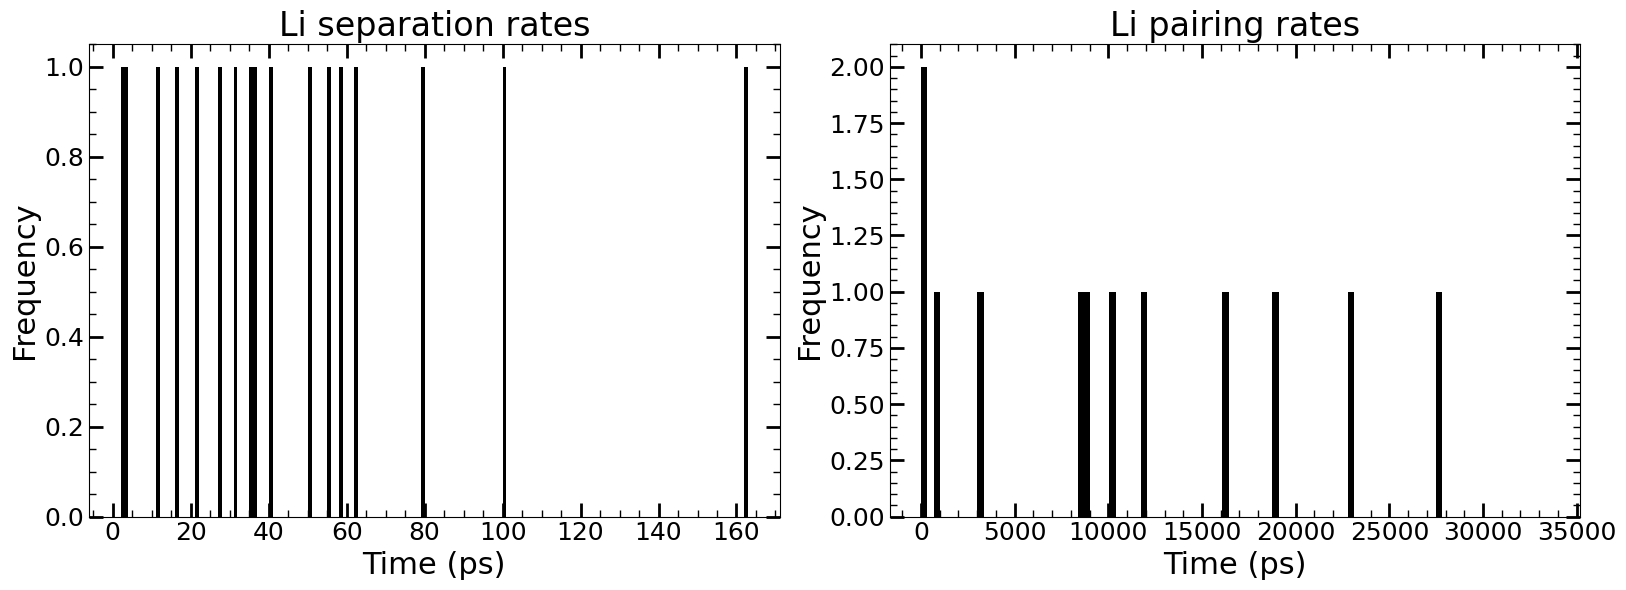

Na separated 290 times
Na paired 290 times
Na separation rates: [12, 10, 2, 7, 6, 5, 27, 28, 9, 17, 3, 23, 12, 11, 20, 18, 5, 6, 20, 14, 15, 13, 12, 30, 33, 7, 13, 8, 35, 44, 7, 18, 5, 5, 32, 19, 1, 12, 8, 9, 5, 22, 18, 19, 8, 1, 7, 2, 4, 25, 3, 15, 3, 12, 7, 5, 24, 5, 18, 4, 36, 29, 8, 39, 4, 6, 10, 19, 3, 16, 16, 8, 20, 15, 18, 6, 6, 8, 9, 15, 14, 7, 18, 34, 29, 25, 14, 12, 10, 3, 30, 7, 10, 2, 14, 5, 8, 10, 24, 4, 3, 19, 7, 3, 13, 25, 11, 25, 9, 22, 8, 2, 1, 19, 22, 19, 14, 18, 14, 36, 22, 23, 3, 4, 14, 8, 58, 16, 3, 12, 5, 12, 4, 21, 8, 7, 14, 8, 3, 18, 14, 12, 4, 16, 5, 7, 17, 1, 11, 39, 7, 25, 6, 38, 9, 3, 23, 26, 14, 6, 13, 3, 17, 3, 17, 3, 17, 4, 7, 18, 10, 6, 12, 22, 10, 15, 23, 18, 6, 11, 2, 13, 13, 16, 20, 11, 7, 30, 11, 8, 11, 17, 4, 18, 5, 4, 25, 16, 6, 5, 4, 3, 24, 16, 12, 18, 7, 3, 7, 26, 4, 10, 25, 18, 19, 13, 14, 19, 13, 5, 16, 3, 25, 11, 11, 7, 7, 11, 5, 16, 31, 23, 7, 11, 5, 11, 17, 3, 1, 12, 13, 25, 3, 11, 7, 3, 4, 16, 63, 8, 20, 1, 16, 11, 8, 5, 12, 27, 20, 9, 21, 

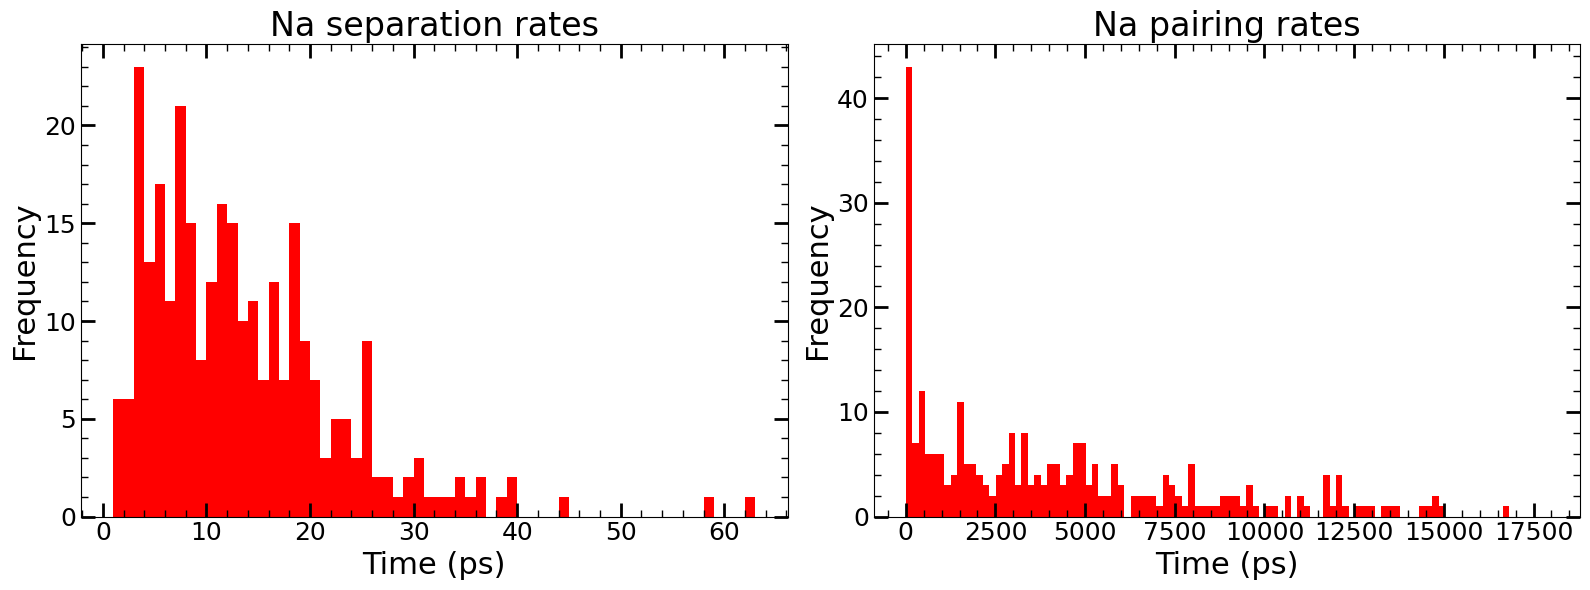

K separated 2044 times
K paired 2045 times
K separation rates: [5, 12, 6, 25, 5, 15, 18, 4, 4, 4, 25, 11, 9, 14, 7, 6, 13, 11, 2, 6, 24, 11, 13, 9, 11, 11, 1, 8, 8, 10, 8, 16, 8, 8, 7, 6, 30, 26, 2, 15, 5, 7, 4, 6, 36, 19, 24, 6, 2, 6, 6, 9, 41, 4, 18, 3, 5, 31, 2, 12, 9, 9, 15, 24, 8, 10, 29, 9, 11, 4, 33, 14, 4, 10, 4, 5, 2, 4, 4, 16, 19, 16, 19, 19, 26, 18, 75, 10, 42, 6, 5, 12, 5, 8, 38, 24, 5, 10, 28, 15, 10, 21, 9, 4, 13, 19, 10, 12, 8, 16, 22, 12, 7, 9, 5, 13, 16, 8, 3, 54, 9, 14, 15, 5, 8, 5, 4, 30, 10, 14, 3, 16, 12, 8, 8, 16, 1, 2, 16, 2, 1, 18, 7, 13, 23, 8, 8, 2, 9, 18, 12, 14, 5, 4, 11, 3, 26, 12, 6, 6, 19, 12, 10, 19, 12, 29, 17, 16, 4, 23, 5, 5, 12, 15, 12, 4, 4, 4, 16, 20, 2, 2, 20, 13, 55, 9, 7, 12, 4, 3, 17, 6, 4, 12, 3, 5, 18, 2, 10, 5, 9, 10, 9, 9, 7, 24, 10, 14, 15, 12, 10, 9, 3, 3, 36, 5, 7, 17, 12, 28, 16, 4, 8, 12, 5, 11, 13, 6, 8, 34, 4, 10, 14, 4, 15, 4, 5, 11, 4, 7, 2, 2, 18, 4, 6, 2, 13, 7, 10, 7, 5, 14, 10, 18, 6, 27, 6, 5, 9, 14, 13, 5, 13, 14, 2, 12, 14, 

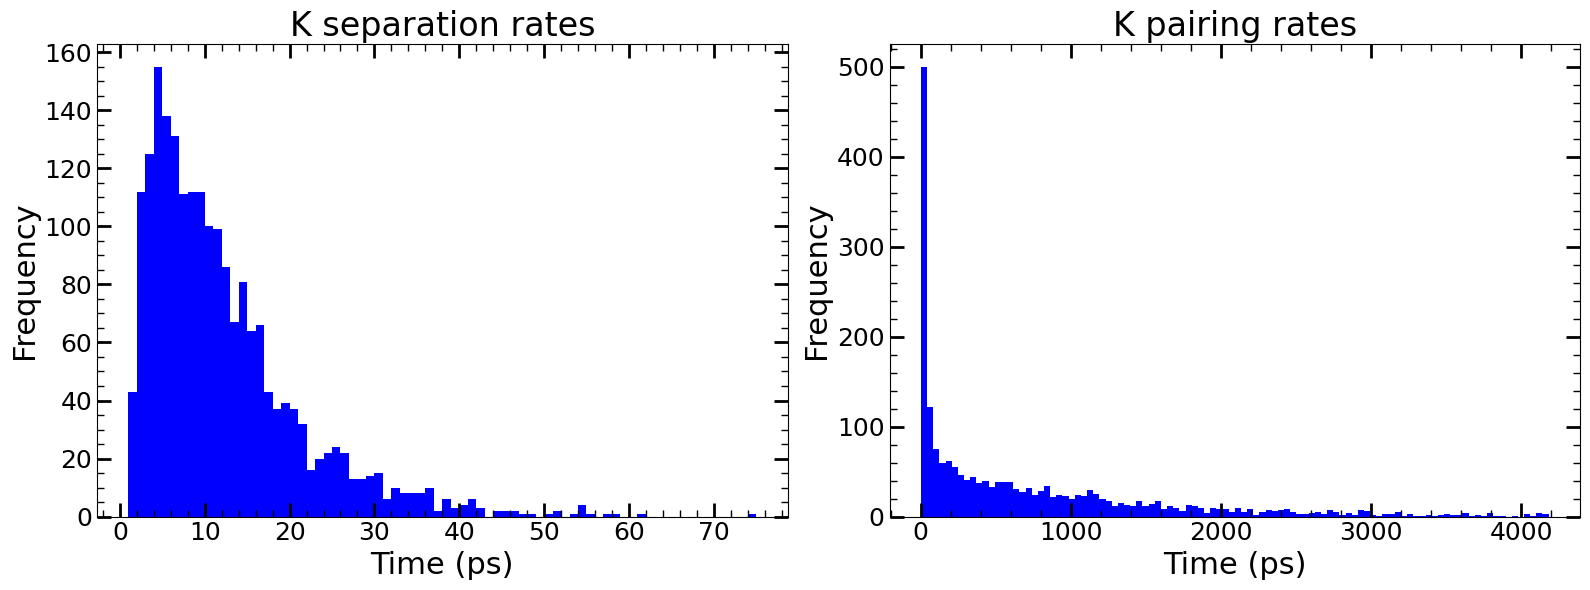

Initial state:  0
Rb separated 2956 times
Rb paired 2955 times
Rb separation rates: [11, 1, 52, 9, 10, 3, 19, 12, 27, 9, 38, 7, 5, 15, 15, 11, 22, 7, 20, 7, 5, 17, 4, 12, 26, 9, 6, 18, 14, 4, 3, 4, 3, 7, 27, 5, 3, 8, 12, 5, 40, 9, 14, 5, 7, 28, 8, 3, 8, 4, 2, 40, 10, 19, 72, 9, 9, 9, 13, 9, 37, 7, 34, 14, 23, 17, 5, 5, 8, 40, 19, 7, 4, 2, 20, 7, 10, 2, 22, 13, 18, 3, 18, 6, 14, 4, 13, 2, 3, 10, 20, 10, 8, 31, 20, 6, 7, 5, 19, 9, 12, 15, 2, 6, 34, 13, 8, 28, 16, 3, 6, 20, 3, 23, 7, 8, 2, 16, 3, 8, 17, 4, 13, 10, 21, 3, 14, 13, 6, 12, 4, 10, 11, 6, 35, 8, 14, 5, 11, 16, 2, 20, 6, 7, 6, 14, 25, 13, 33, 23, 7, 5, 2, 27, 4, 4, 20, 4, 18, 11, 4, 14, 8, 6, 10, 3, 1, 3, 5, 30, 4, 10, 5, 30, 3, 9, 6, 4, 13, 12, 31, 8, 24, 4, 4, 4, 21, 4, 12, 24, 4, 9, 2, 8, 18, 11, 15, 8, 4, 31, 10, 6, 2, 8, 15, 10, 6, 11, 10, 7, 16, 16, 38, 28, 1, 6, 13, 26, 1, 8, 10, 8, 6, 10, 19, 5, 4, 16, 5, 38, 15, 1, 4, 23, 18, 7, 16, 4, 29, 3, 4, 3, 23, 25, 12, 28, 7, 13, 17, 7, 18, 38, 22, 12, 18, 7, 10, 12, 2, 23, 2, 1

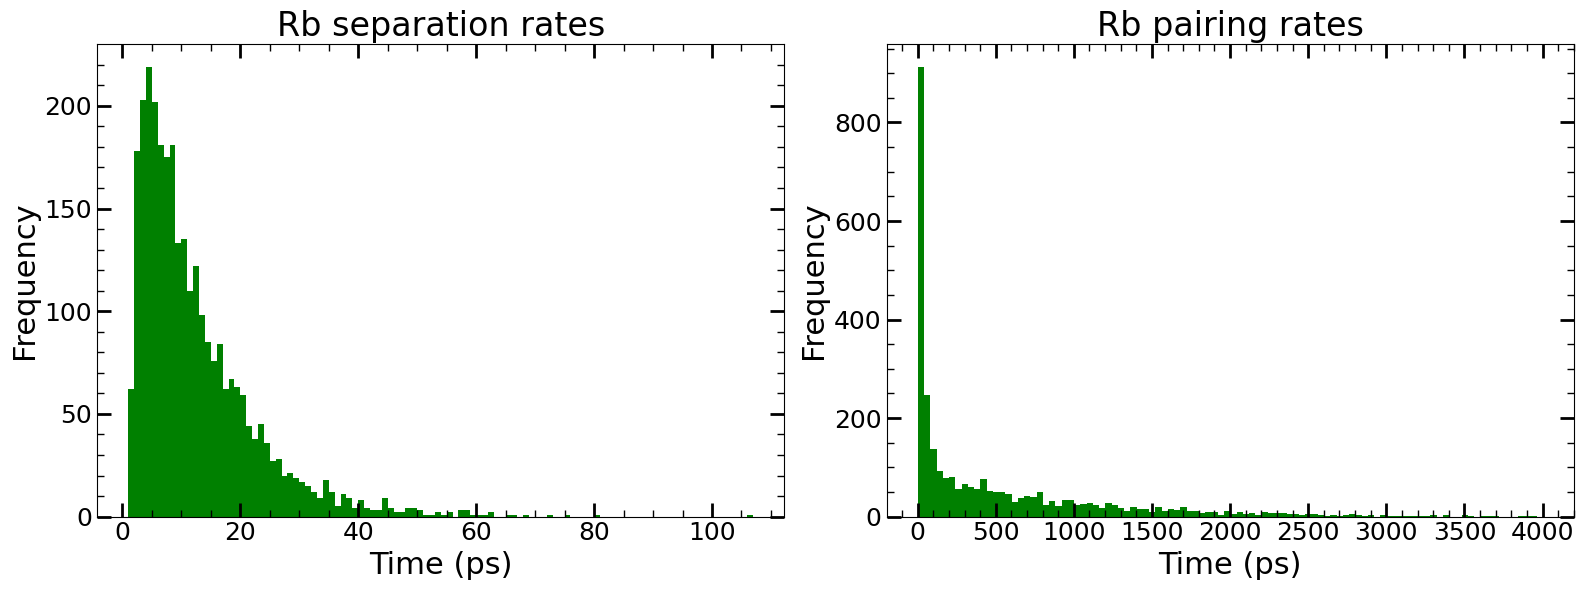

Cs separated 4877 times
Cs paired 4879 times
Cs separation rates: [103, 26, 16, 16, 26, 5, 7, 6, 43, 9, 8, 4, 70, 57, 17, 15, 69, 2, 27, 28, 10, 8, 27, 104, 9, 41, 20, 17, 8, 14, 20, 4, 26, 18, 13, 4, 15, 54, 13, 15, 41, 8, 23, 33, 22, 33, 35, 43, 2, 22, 8, 14, 3, 10, 17, 9, 24, 49, 32, 26, 18, 7, 3, 23, 28, 5, 6, 19, 44, 45, 10, 66, 23, 8, 79, 8, 44, 20, 20, 2, 30, 65, 67, 3, 91, 31, 62, 4, 7, 28, 82, 29, 24, 38, 26, 14, 13, 35, 37, 3, 117, 2, 43, 10, 66, 24, 9, 20, 37, 1, 4, 16, 11, 42, 7, 5, 11, 39, 31, 33, 9, 5, 22, 5, 16, 59, 12, 5, 36, 14, 48, 8, 3, 64, 22, 5, 67, 18, 12, 20, 65, 11, 5, 28, 58, 27, 2, 57, 10, 53, 12, 7, 13, 7, 14, 12, 19, 27, 3, 16, 4, 27, 13, 31, 1, 51, 30, 11, 12, 33, 45, 32, 76, 29, 8, 56, 46, 7, 9, 5, 25, 24, 26, 47, 6, 32, 41, 12, 28, 54, 15, 24, 95, 20, 9, 4, 17, 2, 16, 11, 2, 33, 28, 46, 51, 37, 30, 31, 6, 8, 8, 21, 17, 8, 39, 2, 10, 6, 3, 44, 35, 11, 3, 34, 63, 26, 35, 34, 20, 82, 20, 4, 13, 64, 8, 1, 16, 40, 6, 60, 20, 37, 5, 25, 7, 37, 18, 22, 8, 31, 28

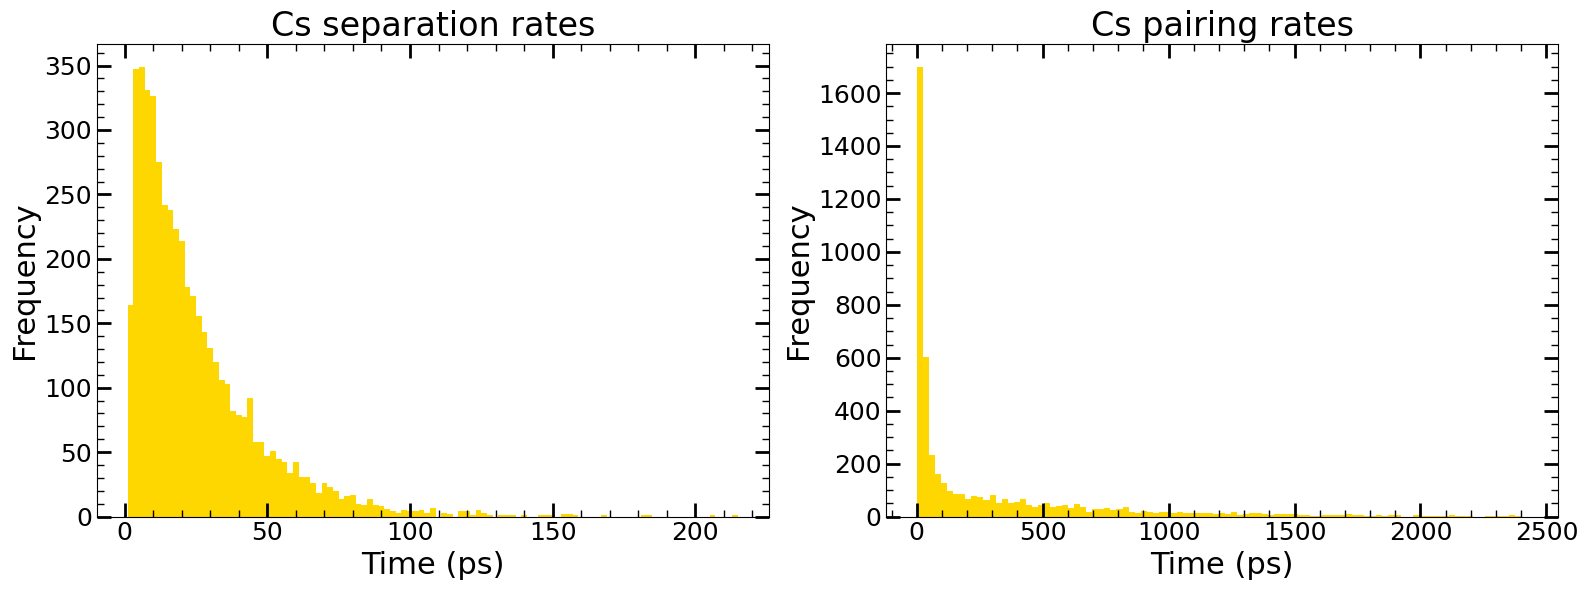

In [10]:
sims_to_plot = 16
nbins = 100
plt.style.use('rcParams.mplstyle')

all = dict()
all[anl[0]] = []
for cation in catl:
    anion = anl[0]
    # for anion in anl:
    all[cation] = []
    for i in range(1, sims_to_plot+1):
        simpath = mpath+f"{nsol}SOL_{nan}{anion}_{ncat}{cation}/{simtime}ns_{pressure:.1f}bar_{temp}K/run_{i}/"
        columns = ['x', cation]
        y = dict()
        for col in columns:
            y[col] = []
        try:
            with open(simpath+f'{cation}-{anion}-distance.xvg') as f:
                lines = f.readlines()
                for col in columns:
                    for line in lines:
                        if line[0] == '#' or line[0] == '@':
                            continue
                        y[col].append(float(line.split()[columns.index(col)]))
                for col in columns:
                    y[col] = np.array(y[col])
                all[cation].append(y[cation])
                x = y['x']
        except:
            print(f"Could not open {simpath+f'{cation}-{anion}-distance.xvg'}")
            continue
        
# for cation in catl:
#     fig, ax = plt.subplots(figsize=(8, 6))
#     if cation == "Li":
#         color = "black"
#     elif cation == "Na":
#         color = "red"
#     elif cation == "K":
#         color = "blue"
#     elif cation == "Rb":
#         color = "green"
#     elif cation == "Cs":
#         color = "gold"
#     if len(all[cation]) > 0:
#         ax.plot(x, all[cation][0], label=f"{cation}-{anl[0]}", color=color)
#     ax.legend()
#     # ax.set_xlim(2, 9)
#     # ax.set_ylim(0, 16)
#     ax.set_xlabel("Time (ps)")
#     ax.set_ylabel("Distance ($\mathrm{\AA}$)")
#     ax.set_title(f"{watermodel}-{ionmodel}-{cation}-{anion}")
#     plt.tight_layout()
#     plt.show()

sep_rate = dict()
num_cross_sep = dict()
num_cross_pair = dict()
pair_rate = dict()
swap_time = dict()
minima = dict()
minima['Li'] = [2.5, 4.6]
minima['Na'] = [2.9, 5.0]
minima['K'] = [3.2, 5.3]
minima['Rb'] = [3.3, 5.3]
minima['Cs'] = [3.2, 5.3]

for cation in catl:
    has_cross = False
    for num in range(sims_to_plot):
        prev_state = 2
        if num > len(all[cation])-1:
            break
        for i in range(len(all[cation][num])):
            if all[cation][num][i] < minima[cation][0]:
                state = 0
            elif all[cation][num][i] > minima[cation][1]:
                state = 1
            else:
                state = prev_state
            if state != prev_state:
                if prev_state == 0:
                    has_cross = True
                    if cation in num_cross_sep:
                        num_cross_sep[cation] += 1
                    else:
                        num_cross_sep[cation] = 1
                    if cation in sep_rate:
                        sep_rate[cation] += [i-pair_time]
                    else:
                        sep_rate[cation] = [i-pair_time]
                    sep_time = i
                    if cation in swap_time:
                        swap_time[cation] += [[num+1, i]]
                    else:
                        swap_time[cation] = [[num+1, i]]
                elif prev_state == 1:
                    has_cross = True
                    if cation in num_cross_sep:
                        num_cross_pair[cation] += 1
                    else:
                        num_cross_pair[cation] = 1
                    if cation in pair_rate:
                        pair_rate[cation] += [i-sep_time]
                    else:
                        pair_rate[cation] = [i-sep_time]
                    pair_time = i
                    if cation in swap_time:
                        swap_time[cation] += [[num+1, i]]
                    else:
                        swap_time[cation] = [[num+1, i]]
                elif prev_state == 2:
                    if state == 0:
                        pair_time = i
                        print("Initial state: ", state)
                    elif state == 1:
                        sep_time = i
                        # print("Initial state: ", state)
            prev_state = state
    if has_cross:
        print(f"{cation} separated {num_cross_sep[cation]} times")
        print(f"{cation} paired {num_cross_pair[cation]} times")
        print(f"{cation} separation rates: {sep_rate[cation]} ps")
        print(f"{cation} pairing rates: {pair_rate[cation]} ps")
        print(f"{cation} pairing times: {swap_time[cation][0::2]} ps")
        print(f"{cation} separation times: {swap_time[cation][1::2]} ps")
        # plot histogram for separation rates with bin centers at integers from min to max
        # nbins = int((max(sep_rate[cation])-min(sep_rate[cation])))
        if cation == "Li":
            color = "black"
        elif cation == "Na":
            color = "red"
        elif cation == "K":
            color = "blue"
        elif cation == "Rb":
            color = "green"
        elif cation == "Cs":
            color = "gold"
        fig, ax = plt.subplots(1,2,figsize=(16, 6))
        # plt.hist(sep_rate[cation], bins=range(min(sep_rate[cation]), max(sep_rate[cation])+1, 1), linewidth=1., color=color)
        ax[0].hist(sep_rate[cation], bins=range(min(sep_rate[cation]), max(sep_rate[cation])+1, max(int((max(sep_rate[cation])-min(sep_rate[cation]))/nbins),1)), linewidth=1., color=color)
        ax[0].set_title(f"{cation} separation rates")
        ax[0].set_xlabel("Time (ps)")
        ax[0].set_ylabel("Frequency")
        ax[1].hist(pair_rate[cation], bins=range(min(pair_rate[cation]), int(max(pair_rate[cation])/2)+1, max(int((max(pair_rate[cation])/2-min(pair_rate[cation]))/nbins),1)), linewidth=1., color=color)
        ax[1].set_title(f"{cation} pairing rates")
        ax[1].set_xlabel("Time (ps)")
        ax[1].set_ylabel("Frequency")
        plt.tight_layout()
        # plt.title(f"{cation} separation rates")
        # plt.xlabel("Time (ps)")
        # plt.ylabel("Frequency")
        plt.show()

            





